ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


(2374, 18) (2374, 49)
1    Negative
2    Negative
3    Negative
4    Negative
Name: covid_status, dtype: object
Negative    1851
Positive     522
Name: covid_status, dtype: int64
<bound method DataFrame.info of          a covid_status   dT ep   fV       g            l_c  \
0     38.0     Negative  web  y  2.0    male  United States   
1     35.0     Negative  web  y  2.0  female          India   
2     45.0     Negative  web  y  2.0    male        Finland   
3     41.0     Negative  web  n  2.0  female          India   
4     29.0     Negative  web  y  2.0    male          India   
...    ...          ...  ... ..  ...     ...            ...   
2369  21.0     Negative  web  y  2.0    male          India   
2370  36.0     Negative  web  y  2.0    male          India   
2371  46.0     Negative  web  y  2.0    male          India   
2372  53.0     Negative  web  y  2.0  female          India   
2373  60.0     Negative  web  y  2.0  female          India   

                     l_s rU     

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


2344
2344
1875
469
1875
469
dict_items([('X_train', array([[ 2.2090000e+03, -2.3229765e-04, -2.0936452e-04, ...,
        -1.0292980e-03,  4.6836340e-03,  1.0465906e-02],
       [ 2.2370000e+03,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 6.7400000e+02,  0.0000000e+00,  0.0000000e+00, ...,
         1.5239490e-01,  1.6481113e-01,  1.8238866e-01],
       ...,
       [ 7.6300000e+02,  0.0000000e+00,  0.0000000e+00, ...,
         2.0045923e-01,  2.1762443e-01,  2.8298658e-01],
       [ 8.3500000e+02,  0.0000000e+00,  0.0000000e+00, ...,
         6.0869124e-02,  5.2481487e-02,  4.7235347e-02],
       [ 1.6530000e+03,  0.0000000e+00,  0.0000000e+00, ...,
        -7.0653800e-02, -7.3941360e-02, -7.9174325e-02]])), ('X_test', array([[ 9.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         5.18134300e-03,  4.56433840e-03,  3.65091070e-03],
       [ 1.03200000e+03,  0.00000000e+00,  0.00000000e+00, ...,
        -9.91464300e-02, -

C:\Users\HP\anaconda3\lib\site-packages\audiomentations\core\transforms_interface.py:57: UserWarning: Warning: input samples dtype is np.float64. Converting to np.float32
  warnings.warn(


3
3
X_train
done X_train E_vowel
y_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   3 non-null      object
dtypes: object(1)
memory usage: 152.0+ bytes
None
done y_train E_vowel
1
6
6
X_train
done X_train E_vowel
y_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   6 non-null      object
dtypes: object(1)
memory usage: 176.0+ bytes
None
done y_train E_vowel
2
9
9
X_train
done X_train E_vowel
y_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   9 non-null      object
dtypes: object(1)
memory usage: 200.0+ bytes
None
done y_train E_vowel
3
12
12
X_train
done X_train E_vowel

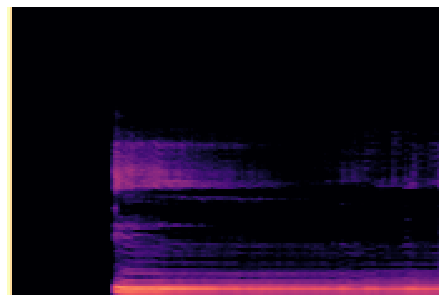

In [4]:
!pip install matplotlib
!pip install os
!pip install librosa
!pip install audiomentations
!pip install pandas
!pip install matplotlib
!pip install sklearn
!pip install torchaudio
!pip install imblearn




import os.path
from os import path
import pandas as pd
import numpy as np
import librosa as librosa
import librosa.display as display
from audiomentations import Compose, AddGaussianNoise, PitchShift
from matplotlib import pylab
from sklearn.model_selection import train_test_split
from torchaudio import transforms
from imblearn.over_sampling import SMOTE
from collections import Counter


custpath = 'sound_type'


# def makedirsSound(sound_type):
#     # status = 'shallow_cough heavy_cough shallow_breadth vowel_'
#     # status = status.split()
#     # for s in status:
#         path_audio = os.path.join(custpath, sound_type)
#         if not path.exists(path_audio):
#             os.makedirs(path_audio)
#             print("Created Directory : ", dir)
#         else:
#             print("Directory already existed ")


# makedirsSound('shallow_cough')
# makedirsSound('heavy_cough')
# makedirsSound('shallow_breath')
# makedirsSound('vowel_E')
# makedirsSound('vowel_O')
# makedirsSound('fast_counting')

output = pd.read_csv('./All_data.csv')

# finding the missing values with threshold
a = output.isnull().sum() / len(output) * 100
variables = output.columns
variable = []

for i in range(output.columns.shape[0]):
    if a[i] <= 40:  # setting the threshold as 40%
        variable.append(variables[i])

# print(variable)

# creating a new dataframe using the above variables

new_data = output[variable]

# shape of new and original data
print(new_data.shape, output.shape)


new_data["covid_status"].replace(
    {"no_resp_illness_exposed": "Negative", "healthy": "Negative", "resp_illness_not_identified": "Negative",
     "recovered_full": "Negative"}, inplace=True)
new_data["covid_status"].replace(
    {"positive_moderate": "Positive", "positive_mild": "Positive", "positive_asymp": "Positive"}, inplace=True)
print(new_data['covid_status'][1:5])

print(new_data["covid_status"].value_counts())  # imbalanced data


tot_rows=len(new_data)
print(new_data.info)


import math, random
import torch


def time_shift(aud, shift_limit):
    # _, sig_len = sig.shape
    sig_len = len(aud)
    shift_amt = int(random.random() * shift_limit * sig_len)
    return (aud.roll(shift_amt))

def pad_trunc(aud, max_ms):
    # sig = aud
    # num_rows, sig_len = aud.shape

    sig_len=len(aud)
    max_len = 22050 // 1000 * max_ms

    if (sig_len > max_len):
        # Truncate the signal to the given length
        aud = aud[:max_len]

    elif (sig_len < max_len):
        # Length of padding to add at the beginning and end of the signal
        pad_begin_len = random.randint(0, max_len - sig_len)
        print(pad_begin_len)
        pad_end_len = max_len - sig_len - pad_begin_len
        print(pad_end_len)

        aud=np.pad(aud, (pad_begin_len, pad_end_len), 'constant')

        # sig = torch.cat((pad_begin, aud, pad_end), 1)

    return (aud)




def clean_audio(sound_type,X,Y):
    for i in range(tot_rows):

        try:
            print(i)
            audio_file = new_data[sound_type][i]
            class_id = new_data['covid_status'][i]
            reaud ,sr= librosa.load(audio_file,duration=4)
            rechan=pad_trunc(reaud,4000)
            print(len(rechan))
            X.append(rechan)
            Y.append(class_id)
            print("ok")
        except:
            print("not found")
            continue



def make_csv_sound_type():
        status = 's_cough h_cough s_breath F_count vowel_E vowel_O'
        status = status.split()
        for s in status:
               X = []
               Y = []
               print(s)
               clean_audio(s,X,Y)
               counter = Counter(Y)
               print(counter)
               my_ar=np.array(X)
               df=pd.DataFrame(my_ar)

               df.insert(loc = 0,column = 'label',value = Y)
               # print(df)
               Counter(Y)
               df.to_csv('{}.csv'.format(s))
               print("done one")

# make_csv_sound_type()

train_test_s_cough = dict()
train_test_h_cough = dict()
train_test_s_breath = dict()
train_test_E_vowel = dict()
train_test_O_vowel = dict()
train_test_fast_count = dict()

# def OverSampling():
#     status = 's_cough h_cough s_breath F_count vowel_E vowel_O'
#     status = status.split()
#     for s,i in zip(status):
#         for i, x in zip(csvs, dicts):
#         print (s)
#         df = pd.read_csv('{}.csv'.format(s))
#         y = np.array(df['label'].values.tolist())
#         X = np.array(df.loc[:, df.columns != 'label'])
#         print(df['label'].value_counts())
#         counter = Counter(y.ravel())
#         print(counter)
#         print("ok")
#         sm = SMOTE(random_state=2)
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#         X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
#         print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
#         print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
#         '{}_dict'.format(s)={}
#         dict.update({'X_train': X_train})
#         dict.update({'X_test': X_test})
#         dict.update({'y_train': y_train})
#         dict.update({'y_test': y_test})



# OverSampling()


def perform_Oversampling_Smote(dict):
    counter = Counter(dict['y_train'].ravel())
    print(counter)
    counter = Counter(dict['y_test'].ravel())
    print(counter)

    for x in dict['y_train']:
        if str(x) == 'nan':
            print(x)
            y_train=dict['y_train'].tolist()
            i=y_train.index('nan')
            dict['X_train'] = dict['X_train'].tolist()
            dict['X_train'].pop(i)
            dict['y_train'] = [x for x in dict['y_train'] if str(x) != 'nan']
    print("deleted nan")

    dict['X_train']=np.array(dict['X_train'])
    dict['y_train']=np.array(dict['y_train'])

    # counter = Counter(dict['X_train'].ravel())
    # print(counter)
    sm = SMOTE(random_state=2)
    print("ok")
    X_train_res, y_train_res = sm.fit_resample(dict['X_train'],dict['y_train'])
    print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
    # print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
    # print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))
    dict['X_train']=X_train_res
    dict['y_train'] =y_train_res




def create_Train_And_Test_data(csvfile,dict):
    df = pd.read_csv(csvfile)
    y = np.array(df['label'].values.tolist())
    X = np.array(df.loc[:, df.columns != 'label'])
    # print(df['label'].value_counts())
    # counter = Counter(y.ravel())
    # print(counter)
    # print("Before OverSampling1, counts of label '1': {}".format(sum(y == 1)))
    # print("Before OverSampling1, counts of label '0': {} \n".format(sum(y == 0)))
    print(len(X))
    print(len(y))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    print(len(X_train))
    print(len(X_test))
    print(len(y_train))
    print(len(y_test))
    dict.update({'X_train':X_train})
    dict.update({'X_test':X_test})
    dict.update({'y_train':y_train})
    dict.update({'y_test':y_test})
    print(dict.items())
    perform_Oversampling_Smote(dict)






add_noise = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.7),
])
pitch_shift = Compose([
    PitchShift(min_semitones=-4, max_semitones=12, p=0.5),
])


sr=2250

def generateMel(audio):
    pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])
    mel = librosa.feature.melspectrogram(y=audio, sr=sr)
    s_db = librosa.power_to_db(mel, ref=np.max)
    display.specshow(s_db)
    return s_db


def savelist(dict1,s):

    for k,v in dict1.items():
        print(k)
        if k=="X_train":
            pathaudio = os.path.join('sound_type', s, str(k)+ ".npy")
            np.save(pathaudio, v)
            print("done {} {}".format(str(k),s))

        if k=="X_test":
            pathaudio = os.path.join('sound_type', s, str(k) + ".npy")
            np.save(pathaudio, v)
            print("done {} {}".format(str(k),s))

        if k=="y_train":
            df = pd.DataFrame(v, columns=['label'])
            print(df.info())
            pathaudio = os.path.join('sound_type',s,str(k) + ".csv")
            df.to_csv(pathaudio.format(str(k)), index=False)
            print("done {} {}".format(str(k), s))

        if k=="y_test":
            df = pd.DataFrame(v, columns=['label'])
            print(df.info())
            pathaudio = os.path.join('sound_type',s,str(k) + ".csv")
            df.to_csv(pathaudio.format(str(k)), index=False)
            print("done {} {}".format(str(k), s))





def generateMelSpectogram(x,s):
    # looping through train data to create melspec and augment data
    # temporary list for the input data
    X_train = []

    # list to append all the labels
    Y_train_ = []
    for i in range(len(x['X_train'])):
        try:

            print(i)
            y= x['y_train'][i]
            # adding noise to the file
            noisy_audio = add_noise(x['X_train'][i], 22050)
            # changing pitch of the audio
            pitch_audio = pitch_shift(x['X_train'][i], 22050)

            # generate melspec for original and augmented files
            pylab.axis('off')  # no axis

            mel=generateMel(x['X_train'][i])
            noise_mel = generateMel(noisy_audio)
            pitch_mel = generateMel(pitch_audio)

            # appending augmented data to original training data
            X_train.append(mel)
            Y_train_.append(y)
            X_train.append(noise_mel)
            Y_train_.append(y)
            X_train.append(pitch_mel)
            Y_train_.append(y)

        except Exception as e:
            print("Error in file:")
            print("Error:", e)
            continue

        print(len(X_train))
        print(len(Y_train_))
        dict1={'X_train':X_train,'y_train':Y_train_}
        savelist(dict1,s)







# looping through train data to create melspec and augment data
# for i, dat in tqdm(enumerate(audio_test)):

def testgeneratespec(x,s):
    # temporary list for the input data
    Xtest = []

    # list to append all the labels
    Y_test = []
    for i in range(len(x['X_test'])):

        try:
            print(i)
            # generate melspec for original and augmented files
            # mel = get_melspec(dat)
            mel = generateMel(x['X_test'][i])

            # Appending test melspec to list
            Xtest.append(mel)
            Y_test.append(x['y_test'][i])


        except Exception as e:
            print("Error in file:")
            print("Error:", e)

        dict1 = {'X_test': Xtest, 'y_test': Y_test}
        savelist(dict1, s)

#
# def load_files():
#     X_train = np.load('X_train_.npy')
#     Xtest = np.load('X_test_.npy')


def samplesDict():
    csvs = ['vowel_E.csv']
    status = ['E_vowel']
    s_cough = dict()
    h_cough = dict()
    s_breath = dict()
    E_vowel = dict()
    O_vowel = dict()
    fast_count = dict()
    dicts = [O_vowel]
    for i, x,s in zip(csvs, dicts,status):
        print(i, x,s)
        create_Train_And_Test_data(i, x)
        generateMelSpectogram(x,s)
        testgeneratespec(x,s)

samplesDict()

In [1]:
!pip install numpy
import numpy as np

X_train=np.load('E_vowel/X_train.npy')
Xtest=np.load('E_vowel/X_test.npy')

X_train = np.stack(X_train)
Xtest = np.stack(Xtest)

In [2]:
import csv

with open('E_vowel/y_train.csv', newline='') as f:
    reader = csv.reader(f)
    Y_train = list(reader)

print(Y_train)
Y_train.pop(0)
print(Y_train)

with open('E_vowel/y_test.csv', newline='') as f:
    reader = csv.reader(f)
    Y_test = list(reader)

print(len(Y_test))
Y_test.pop(0)

!pip install sklearn
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y_train)

Y_train = encoder.transform(Y_train).reshape([len(Y_train), 1])

encoder = LabelEncoder()
encoder.fit(Y_test)

Y_test = encoder.transform(Y_test).reshape([len(Y_test), 1])

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
Xtest = Xtest.reshape(Xtest.shape[0],Xtest.shape[1],Xtest.shape[2],1)



print(X_train.shape)
print(Xtest.shape)
print(Y_train.shape)
print(Y_test.shape)

[['label'], ['Positive'], ['Positive'], ['Positive'], ['Negative'], ['Negative'], ['Negative'], ['Positive'], ['Positive'], ['Positive'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Positive'], ['Positive'], ['Positive'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Positive'], ['Positive'], ['Positive'], ['Negative'], ['Negative'], ['Negative'], ['Positive'], ['Positive'], ['Positive'], ['Negative'], ['Negative'], ['Negative'], ['Positive'], ['Positive'], ['Positive'], ['Positive'], ['Positive'], ['Positive'], ['Positive'], ['Positive'], ['Positive'], ['Positive'], ['Positive'], ['Positive'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negati

C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [3]:
#importing the keras modules
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, GRU,BatchNormalization
from keras import regularizers
from keras.constraints import unit_norm
import tensorflow as tf

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(X_train.shape[1:])))
Dropout(0.25),
model.add(Conv2D(64, kernel_size=(3, 3),strides=(2,2), activation='relu',padding='same')),
model.add(MaxPooling2D((2, 2)))
BatchNormalization()


model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))


'''
Optimizer = Adam
Loss = binary_crossentropy
'''
optimiser = tf.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimiser, metrics=['accuracy'])
model.summary()

history = model.fit(X_train, Y_train, validation_data=(Xtest, Y_test),batch_size=32,epochs=10)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 172, 32)      320       
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 86, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 43, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 88064)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               11272320  
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                      

In [7]:
print("saving model")
model.save('models/vowel_E_model')

saving model
INFO:tensorflow:Assets written to: models/vowel_E_model\assets


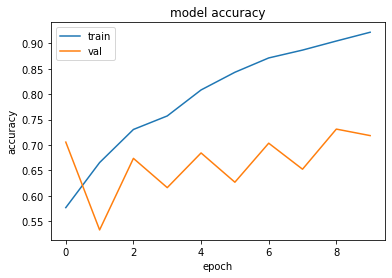

In [6]:
!pip install matplotlib
from matplotlib import pylab

pylab.plot(history.history['accuracy'])
pylab.plot(history.history['val_accuracy'])
pylab.title('model accuracy')
pylab.ylabel('accuracy')
pylab.xlabel('epoch')
pylab.legend(['train', 'val'], loc='upper left')
pylab.show()                                                                    

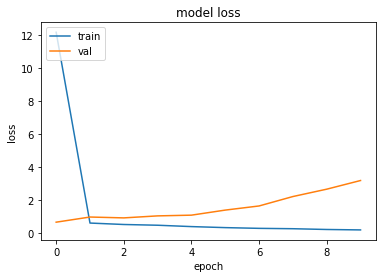

In [8]:
pylab.plot(history.history['loss'])
pylab.plot(history.history['val_loss'])
pylab.title('model loss')
pylab.ylabel('loss')
pylab.xlabel('epoch')
pylab.legend(['train', 'val'], loc='upper left')
pylab.show()

In [9]:
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# extract the predicted probabilities
p_pred = model.predict(Xtest)
p_pred = p_pred.flatten()
# print(p_pred.round(2))
# [1. 0.01 0.91 0.87 0.06 0.95 0.24 0.58 0.78 ...

# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)
# print(y_pred)
# [1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 ...

cf_matrix=confusion_matrix(Y_test, y_pred)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(Y_test,y_pred)
print('Classification report : \n',matrix)



Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       356
           1       0.40      0.33      0.36       113

    accuracy                           0.72       469
   macro avg       0.60      0.59      0.59       469
weighted avg       0.70      0.72      0.71       469



<AxesSubplot:>

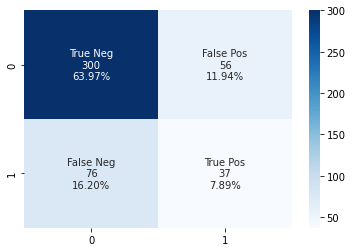

In [10]:
!pip install seaborn
import seaborn as sns


group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')